# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [1]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

print(x)
print(y)

print("---------------------------------")

sub = y - x
print(sub)

[1 3 5]
[2 5]
---------------------------------


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

When trying to subtract the two arrays before reshaping them, you get a ValueError that states, "operands could notbe broadcast together with shapes (2,) (3,). This error occurs because the vectors are two different lengths. 

In [3]:
x2 = x.reshape(-1,1)
y2 = y.reshape(1,-1)
print(x2)
print(y2)
print("--------------------")
sub2 = x2 - y2
print(sub2)

[[1]
 [3]
 [5]]
[[2 5]]
--------------------
[[-1 -4]
 [ 1 -2]
 [ 3  0]]


After reshaping the x and y vectors, the output is a 3x2 matrix that is the result of subtracting the y vector from the x vector.

In [4]:
x3 = x.reshape(1,-1)
y3 = y.reshape(-1,1)
print(x3)
print("--------------------")
print(y3)
print("--------------------")
sub3 = x3 - y3
print(sub3)

[[1 3 5]]
--------------------
[[2]
 [5]]
--------------------
[[-1  1  3]
 [-4 -2  0]]


The output after reshaping the two vectors is a 2x3 matrix

In [ ]:
# link: https://stackoverflow.com/questions/9165374/write-code-that-does-the-same-like-numpys-reshape
# writing two for double loops for first example -  want to reshape the first array to only one column and the second to only have one row
x = np.array([1,3,5])
# the following for loop will reshape the array to be a singular row a 1x3 matrix
reshaped = []
row = []
for i in range(1):
    for j in range(3):
        row.append(int(x[j]))
    reshaped.append(row)
print(reshaped)

[[1, 3, 5]]


In [ ]:
x = np.array([1,3,5])
# the following for loop will reshape the array to be a singular row a 1x3 matrix
reshaped2 = []
row2 = []
for i in range(3):
    for j in range(1):
        row2.append(int(x[j]))
    reshaped2.append(row2)
print(reshaped2)
# COME BACK AND FINISH

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

[ 0  2  5  7 10]
[0, 0, 1, 1, 1]


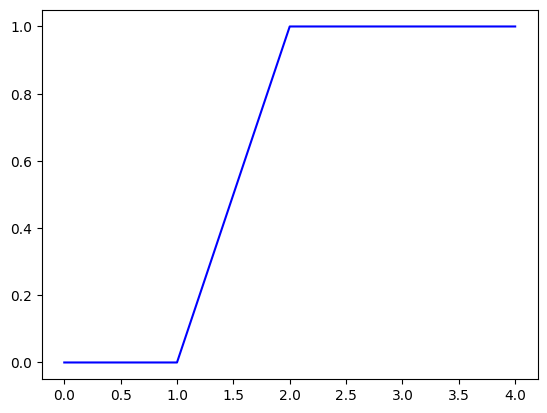

In [ ]:
# plotting the indicator function
data = np.linspace(0, 10, 5, dtype=int)
print(data)

def indicator_function(input_data, threshold):
    indicators = []
    for z in input_data:
        if z >= threshold:
            indicators.append(1)
        else:
            indicators.append(0)
    return indicators
    

idk = indicator_function(data,3)
print(idk)
        
# okay now i need to plot the output

# Plot
plt.plot(idk, color='blue')
plt.show()


# NEED TO WORK ON THE X AXIS


$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ is true because of how the indicator function operates. The variable Z in the operator function can be thought of as the data that is being evaluated, while x is the threshold that the data is being compared to. The act

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?